<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-1/blob/main/YB0321(1)_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [15]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

#.tsv는 Tab-Separated Values 파일
#즉, 컬럼 간 구분자가 ',(콤마)'가 아니라 '\t(탭)'이기 때문에 sep='\t'가 필요함

### Step 4. See the first 10 entries

In [16]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [17]:
top_5_items = chipo['item_name'].value_counts().head(5).index.tolist()
print(top_5_items)

# item_name별 quantity 총합 구해서 내림차순 정렬 → 상위 5개 추출
top_5_items_by_quantity = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
print(top_5_items_by_quantity)

['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole', 'Steak Burrito', 'Canned Soft Drink']
item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


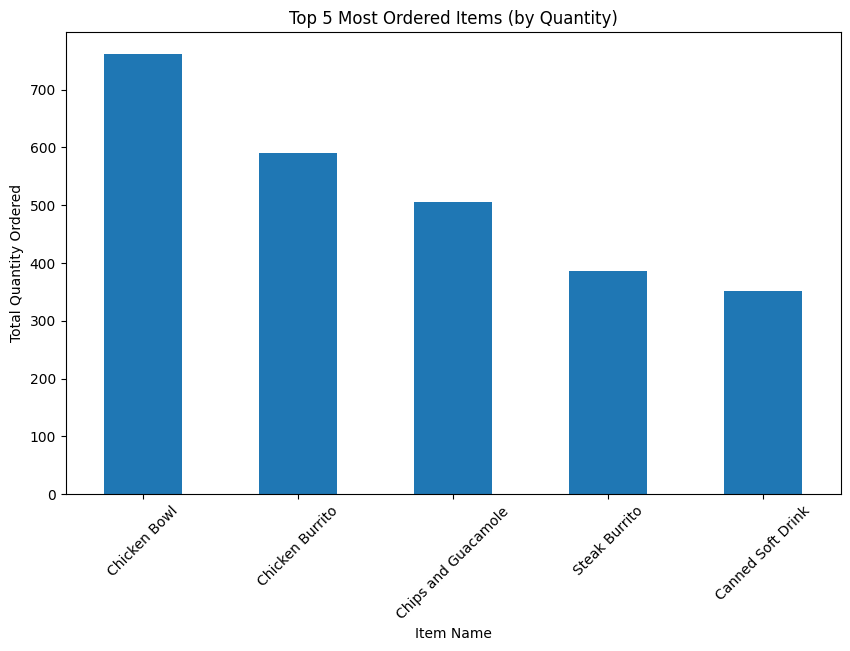

In [18]:
# 히스토그램 그리기
top_5_items_by_quantity.plot(kind='bar', figsize=(10, 6))

# 그래프 꾸미기
plt.title('Top 5 Most Ordered Items (by Quantity)')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

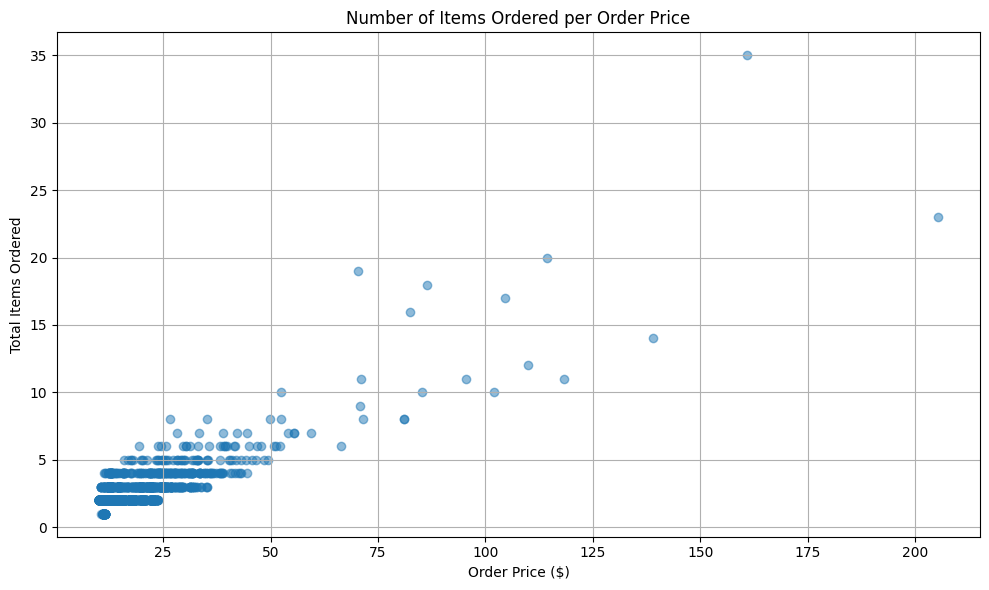

In [19]:
# item_price를 숫자로 변환
chipo['item_price'] =  chipo['item_price'].str.replace('$', '').astype(float)
#str.replace('$', ''): 문자열에서 $ 제거
#astype(float): 실수형으로 변환

# order_id별로 총 수량과 총 가격 계산
order_group = chipo.groupby('order_id').agg({'quantity': 'sum','item_price': 'sum'}).reset_index()

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(order_group['item_price'], order_group['quantity'], alpha=0.5)

# 그래프 꾸미기
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Total Items Ordered')
plt.grid(True)
plt.tight_layout()

plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

 > Step7. 메뉴별 총 매출 상위 Top 10

 목적: 어떤 메뉴가 가장 많은 돈을 벌었는지 보기

 방법: item_name별 item_price * quantity를 곱해서 총 매출 계산


item_name
Chicken Bowl                    8044.63
Chicken Burrito                 6387.06
Steak Burrito                   4236.13
Steak Bowl                      2479.81
Chips and Guacamole             2475.62
Chicken Salad Bowl              1506.25
Chicken Soft Tacos              1199.01
Chips and Fresh Tomato Salsa    1033.96
Veggie Burrito                  1002.27
Veggie Bowl                      901.95
Name: total_price, dtype: float64


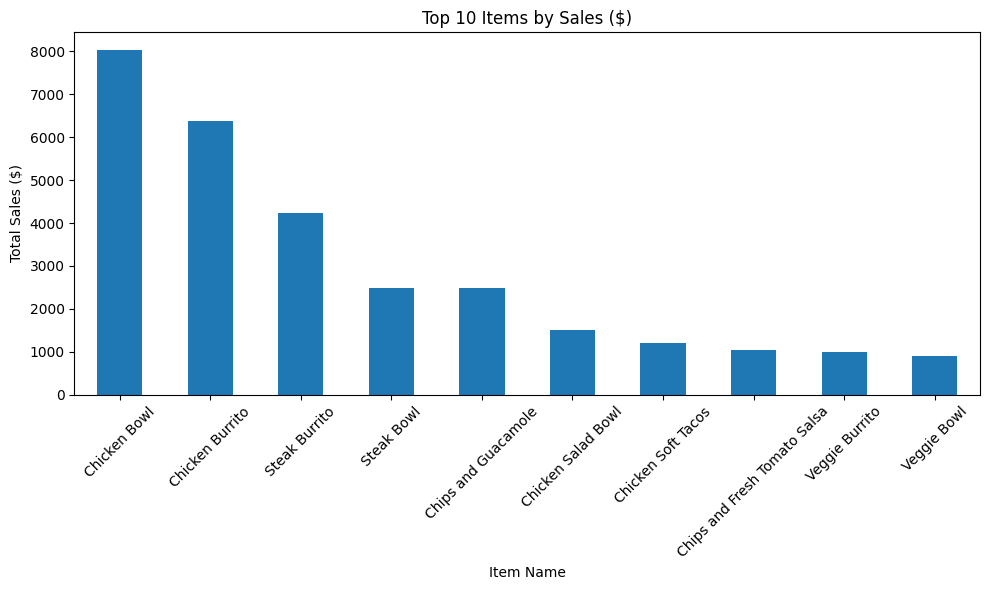

In [20]:
chipo['total_price'] = chipo['quantity'] *  chipo['item_price']
top_sales = chipo.groupby('item_name')['total_price'].sum().sort_values(ascending=False).head(10)
print(top_sales)

top_sales.plot(kind='bar', figsize=(10, 6), title='Top 10 Items by Sales ($)')
plt.ylabel('Total Sales ($)')
plt.xlabel('Item Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> 가장 많이 주문된 상위 5개의 아이템과 매출이 높은 상위 5개의 아이템이 다르다는 것을 확인할 수 있었다.